# 01 : Frame the Problem

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14042463291096300426
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9189418657366055801
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17763427376046861238
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10784600884
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18182233482101379703
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


# 02 : Obtaining the Data

In [8]:
ls -l

NameError: ignored

In [9]:
!wget https://www.dropbox.com/s/avul1qk8eeaqebo/dataset.zip

--2019-02-10 23:07:50--  https://www.dropbox.com/s/avul1qk8eeaqebo/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/avul1qk8eeaqebo/dataset.zip [following]
--2019-02-10 23:07:51--  https://www.dropbox.com/s/raw/avul1qk8eeaqebo/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca3d217f794365e6a05e049f95f.dl.dropboxusercontent.com/cd/0/inline/AbHowzd26QIpDJsjTFhWvPvTeA4CFWQorzZ1FswLai3E9Z1HTaDXnbnQ24chl7npc7bPq-U2zlxXnKYJK0GO61U5bpxqXJfEPt8UPCGFx1iAog/file# [following]
--2019-02-10 23:07:51--  https://uca3d217f794365e6a05e049f95f.dl.dropboxusercontent.com/cd/0/inline/AbHowzd26QIpDJsjTFhWvPvTeA4CFWQorzZ1FswLai3E9Z1HTaDXnbnQ24chl7npc7bPq-U2zlxXnKYJK0GO61U5bpxqXJfEPt8UPCGFx1iAog/file
Resolving uca3d217f

In [0]:
cat wget-log.1

In [0]:
ls -l

In [0]:
!ls -l

# 04 : Feature Engineering

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
!unzip dataset.zip >> 0

In [23]:
ls -l 

total 222556
-rw-r--r-- 1 root root    522131 Feb 10 23:24 0
drwxr-xr-x 5 root root      4096 Jun  6  2018 dataset/
-rw-r--r-- 1 root root 227353580 Feb 10 23:07 dataset.zip
drwxrwxr-x 3 root root      4096 Aug  9  2018 __MACOSX/
drwxr-xr-x 1 root root      4096 Feb  6 17:31 sample_data/


In [24]:
cd dataset/


/content/dataset


In [25]:
ls -l

total 12
-rw-r--r-- 1 root root    0 Jun  6  2018 Icon
drwxr-xr-x 2 root root 4096 Jun  7  2018 single_prediction/
drwxr-xr-x 4 root root 4096 Jun  6  2018 test_set/
drwxr-xr-x 4 root root 4096 Jun  6  2018 training_set/


In [26]:
cd training_set

/content/dataset/training_set


In [27]:
ls -l

total 256
drwxr-xr-x 2 root root 131072 Aug  9  2018 cats/
drwxr-xr-x 2 root root 131072 Aug  9  2018 dogs/
-rw-r--r-- 1 root root      0 Jun  6  2018 Icon


In [29]:
cd /content

/content


In [30]:
ls

0  dataset/  dataset.zip  __MACOSX/  sample_data/


In [31]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 7863 images belonging to 2 classes.


In [32]:
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1955 images belonging to 2 classes.


# 05 : Model Selection

In [0]:
classifier = Sequential()

In [11]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
classifier.add(Conv2D(64, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [0]:
classifier.add(Flatten())

In [0]:
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [16]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Step 8: Image Data Generation

# Step 6: Fitting and Prediction

In [34]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 70,
                         epochs = 16,
                         validation_data = test_set,
                         validation_steps = 10)

Epoch 1/16
70/70 [==============================] - 11s 159ms/step - loss: 0.5920 - acc: 0.6871 - val_loss: 0.6882 - val_acc: 0.6125
Epoch 2/16
70/70 [==============================] - 11s 159ms/step - loss: 0.5612 - acc: 0.7085 - val_loss: 0.6984 - val_acc: 0.6375
Epoch 3/16
70/70 [==============================] - 11s 156ms/step - loss: 0.5520 - acc: 0.7162 - val_loss: 0.5024 - val_acc: 0.7344
Epoch 4/16
70/70 [==============================] - 11s 158ms/step - loss: 0.5440 - acc: 0.7250 - val_loss: 0.5600 - val_acc: 0.7188
Epoch 5/16
70/70 [==============================] - 11s 157ms/step - loss: 0.5404 - acc: 0.7246 - val_loss: 0.4714 - val_acc: 0.8076
Epoch 6/16
70/70 [==============================] - 11s 159ms/step - loss: 0.5362 - acc: 0.7259 - val_loss: 0.5246 - val_acc: 0.7906
Epoch 7/16
70/70 [==============================] - 11s 157ms/step - loss: 0.5181 - acc: 0.7464 - val_loss: 0.5021 - val_acc: 0.7719
Epoch 8/16
70/70 [==============================] - 11s 160ms/step - 

In [55]:
classifier.get_weights()

AttributeError: ignored

In [53]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

### Step 10 : Prediction on new class

In [0]:
from keras.preprocessing import image
import numpy as np

In [36]:
!wget https://www.dropbox.com/s/qr2girs8xh6ay8f/test_image.jpeg

--2019-02-10 23:58:11--  https://www.dropbox.com/s/qr2girs8xh6ay8f/test_image.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qr2girs8xh6ay8f/test_image.jpeg [following]
--2019-02-10 23:58:11--  https://www.dropbox.com/s/raw/qr2girs8xh6ay8f/test_image.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccef378278d4588312ba9834c46.dl.dropboxusercontent.com/cd/0/inline/AbGQS8z5-HIX11sSOmentB2khXFAe6e3HqVfirbuSGGPIWDkj7NdCv6myRd-uSU-5LLl2L9K02bseYLAz15exSTpbj-RoE-KmLI9a45q7U3qzA/file# [following]
--2019-02-10 23:58:12--  https://uccef378278d4588312ba9834c46.dl.dropboxusercontent.com/cd/0/inline/AbGQS8z5-HIX11sSOmentB2khXFAe6e3HqVfirbuSGGPIWDkj7NdCv6myRd-uSU-5LLl2L9K02bseYLAz15exSTpbj-RoE-KmLI9a45q7U3qzA/file
Resolvi

<h4> Test Image </h4>
<center><img src="https://www.dropbox.com/s/qr2girs8xh6ay8f/test_image.jpeg" ></img></center>



In [0]:
test_image = image.load_img('test_image.jpeg', target_size=(64,64))

In [0]:
test_image = image.img_to_array(test_image)

In [0]:
test_image = np.expand_dims(test_image, axis=0)

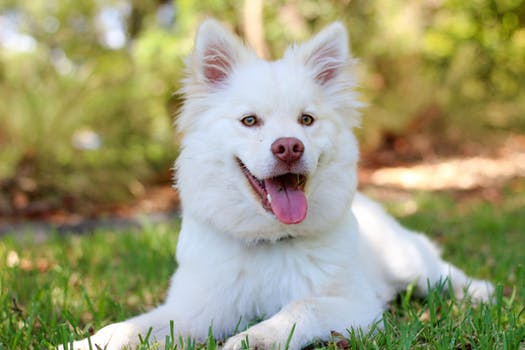

In [56]:
from IPython.display import Image
Image(filename="test_image.jpeg")

In [0]:
result = classifier.predict(test_image)

In [43]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [51]:
if result[0][0] == 1:
  print("Dog")
else:
  print("Cat")

Dog


In [52]:
type(result)

numpy.ndarray

In [0]:
result

<h3><center>The End</center></h3>